Initial setup

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%run "Common setup.ipynb"

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
RC = mk.RecordCollection("{}/rest_filtered_corpora.txt".format(TMP_DIR))

<hr> Convert manually sorted papers to dataframe

In [4]:
software_packages = pd.read_csv('{}/uasa_software_phrases_sorted_2019-03-01.csv'.format(DATA_DIR))

In [5]:
software_packages

,relevant,DOI,title,1,2,3,4,5
0,?,10.1117/1.JRS.7.073591,Determination of the overlap factor and its en...,The problem of overlap factor (OVF) computatio...,A sensitivity analysis is carried out as a fun...,Insertion of a field lens proves to be an eleg...,Parametric simulations are carried out to show...,The ray-tracing approach presented here is str...
1,No (not related to environment),10.1615/Int.J.UncertaintyQuantification.201601...,SOFTWARE RELIABILITY GROWTH MODEL WITH TEMPORA...,Increasingly software systems are developed to...,Based on a stochastic model of the software fa...,"To validate our model, we consider five partic...",Experimental comparisons with existing methods...,"Based on the stochastic model, the analytical ..."
2,?,10.2166/wqrjc.2011.028,A simulation of the fate of nitrogen in an on-...,"Following a sensitivity analysis, the model wa...",Modeling was performed with the GPS-X (TM) sof...,The calibrated model shows a good agreement wi...,Modeling of residential wastewater treatment a...,Obtained results show that the studied pilot u...
3,?,10.1002/2017WR020814,"A Practical, Robust Methodology for Acquiring ...",These predictions often contain a significant ...,Regional groundwater flow models play an impor...,One way to reduce this uncertainty is to colle...,The so-called Null-Space Monte Carlo method is...,The method incorporates any existing informati...
4,No (not related to environment),10.1002/cnm.2615,Verification of computational models of cardia...,"The field of 'verification, validation and unc...","The first stage, verification, is the evaluati...",These problems are carefully constructed so th...,For computational models of cardiac activity t...,We define D-D model problems with exact soluti...
5,No,10.1016/j.watres.2009.03.017,Nitritation performance and biofilm developmen...,Mathematical simulations of these two geometri...,The modeling simulations demonstrated that Ki ...,The experimental results showed that the count...,mg L-) and high pH (.-.,Sensitivity analysis results showed that the o...
6,?,10.1214/14-BA909,Sensitivity Analysis for Bayesian Hierarchical...,We propose a novel formal approach to prior se...,Other formal approaches to prior sensitivity a...,"Despite its importance, informal approaches to...",It quantifies sensitivity without the need for...,Prior sensitivity examination plays an importa...
7,Yes - NEVA,10.1007/s10584-014-1254-5,Non-stationary extreme value analysis in a cha...,The software presents the results of non-stati...,NEVA includes posterior probability intervals ...,This framework is implemented in the Non-stati...,We evaluate both stationary and non-stationary...,This paper introduces a framework for estimati...
8,Yes,10.1061/(ASCE)CP.1943-5487.0000239,Study of MEPDG Sensitivity Using Nonparametric...,Using four-layer pavement geometry [two asphal...,Because the new Mechanistic-Empirical Pavement...,"Instead, nonparametric regression procedures c...",Thirty inputs are used to randomly generate i...,"In addition to these, alligator cracking is hi..."
9,Yes - GUI-HDMR,10.1016/j.envsoft.2008.12.002,GUI-HDMR - A software tool for global sensitiv...,The developed GUI-HDMR software copes very wel...,GUI-HDMR can be applied to a wide range of app...,The high dimensional model representation (HDM...,The HDMR software described here combines the ...,The performance of the GUI-HDMR software has b...


In [6]:
software_rc = wosis.find_pubs_by_doi(RC, software_packages.DOI)

<hr>Analysing the software data
<br> - Keyword trend
<br> - Publication trend

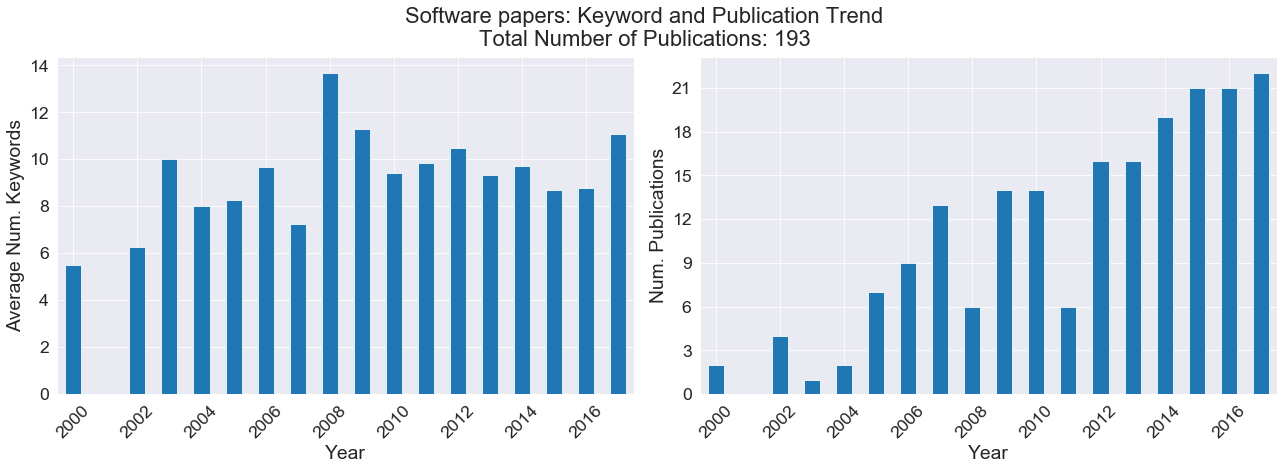

In [7]:
wos_plot.plot_kw_trend(software_rc, title='Software papers: Keyword and Publication Trend', 
                       save_plot_fn='{}/software_kw_trend.png'.format(FIG_DIR))

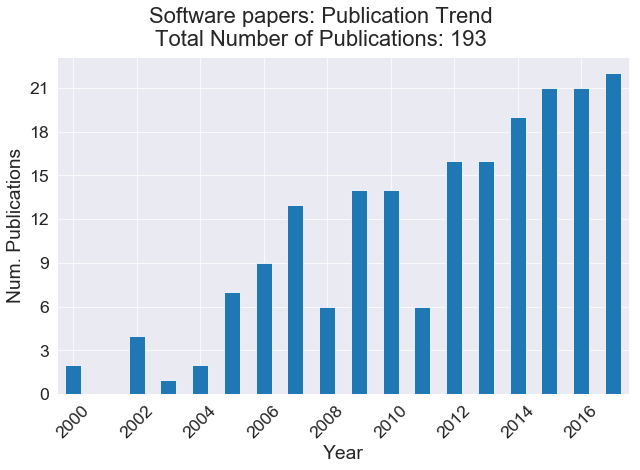

In [8]:
wos_plot.plot_pub_trend(software_rc, title='Software papers: Publication Trend', 
                        save_plot_fn='{}/software_pub_trend.png'.format(FIG_DIR))

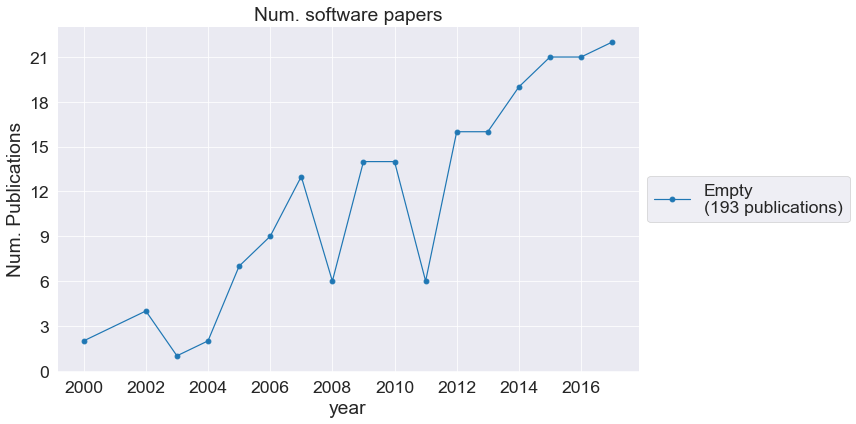

In [9]:
wos_plot.plot_topic_trend([software_rc], total_rc=False, title='Num. software papers', 
                          save_plot_fn='{}/software_topic_trend'.format(FIG_DIR))

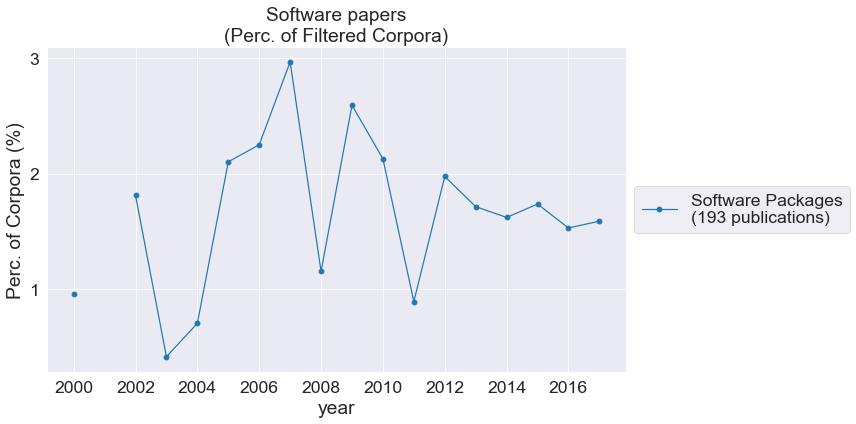

In [10]:
software_rc.name = 'Software Packages'
wos_plot.plot_topic_trend([software_rc], total_rc=RC, title='Software papers\n(Perc. of Filtered Corpora)', 
                          save_plot_fn='{}/software_topic_trend'.format(FIG_DIR))

<hr> 
   - Identifying UA/SA/optimization in the corpora <br>
   - Ploting keyword, publication, and topic trend

In [11]:
UQ = wosis.keyword_matches(software_rc, ['uncertainty analysis', 'ua', 'uncertainty quantification'], threshold=95.0)

In [12]:
all_uq = UQ.combine_recs()

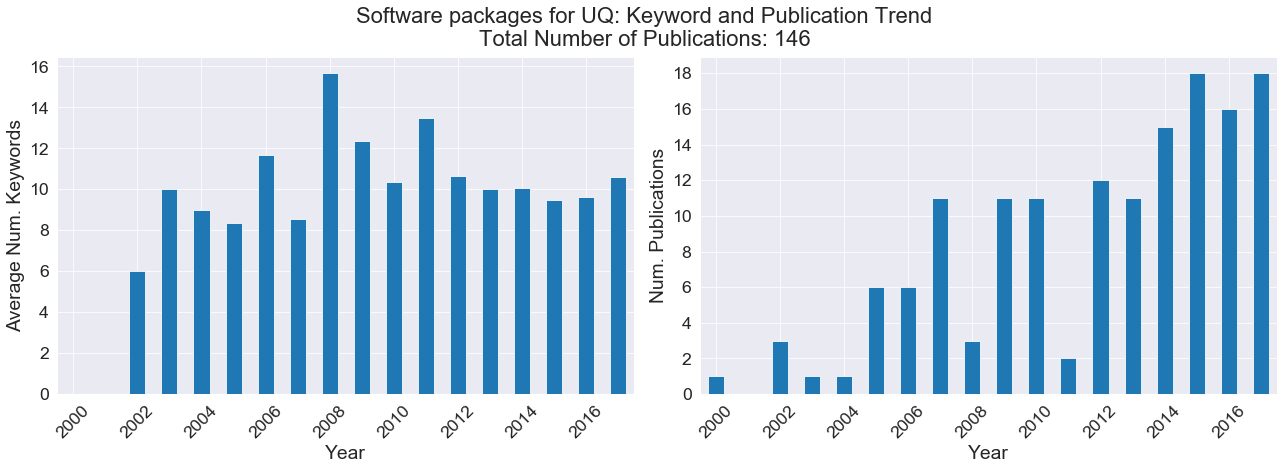

In [13]:
wos_plot.plot_kw_trend(all_uq, title='Software packages for UQ: Keyword and Publication Trend', 
                       save_plot_fn='{}/uq_pub_trend.png'.format(FIG_DIR))

In [14]:
SA = wosis.keyword_matches(software_rc, ['sensitivity analysis', 'sa'], threshold=95.0)

In [15]:
all_sa = SA.combine_recs()

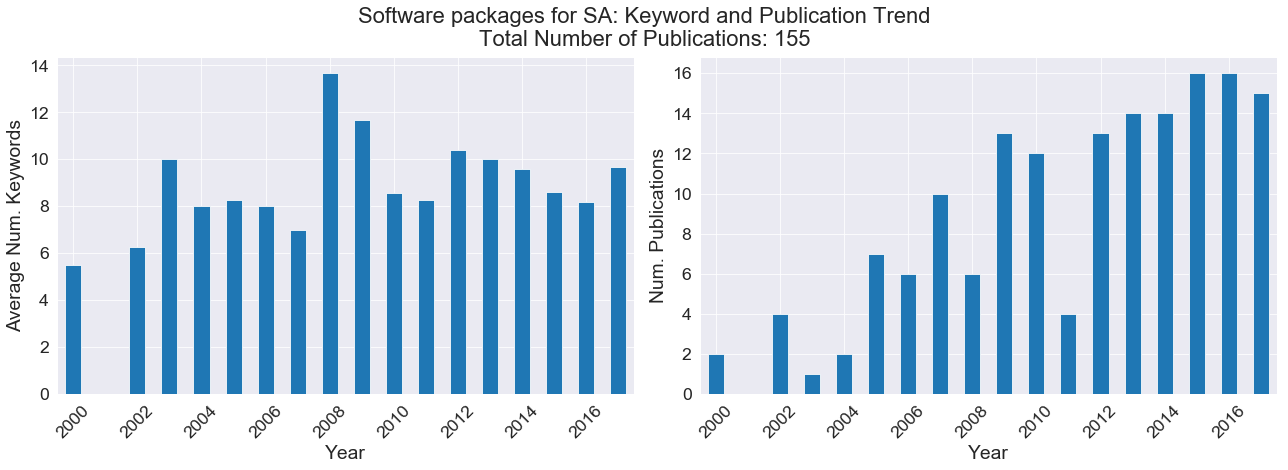

In [16]:
wos_plot.plot_kw_trend(all_sa, title='Software packages for SA: Keyword and Publication Trend', 
                       save_plot_fn='{}/sa_pub_trend.png'.format(FIG_DIR))

In [17]:
optimization = wosis.keyword_matches(software_rc, ['optimization'], threshold=95.0)

In [18]:
all_optimization = optimization.combine_recs()

In [19]:
all_opt_df = wosis.rc_to_df(all_optimization)
all_opt_df.loc[all_opt_df['year'] == 2007, 'title'].tolist()

['Methods and object-oriented software for FE reliability and sensitivity analysis with application to a bridge structure',
 'Parameter estimation and uncertainty analysis for a watershed model']

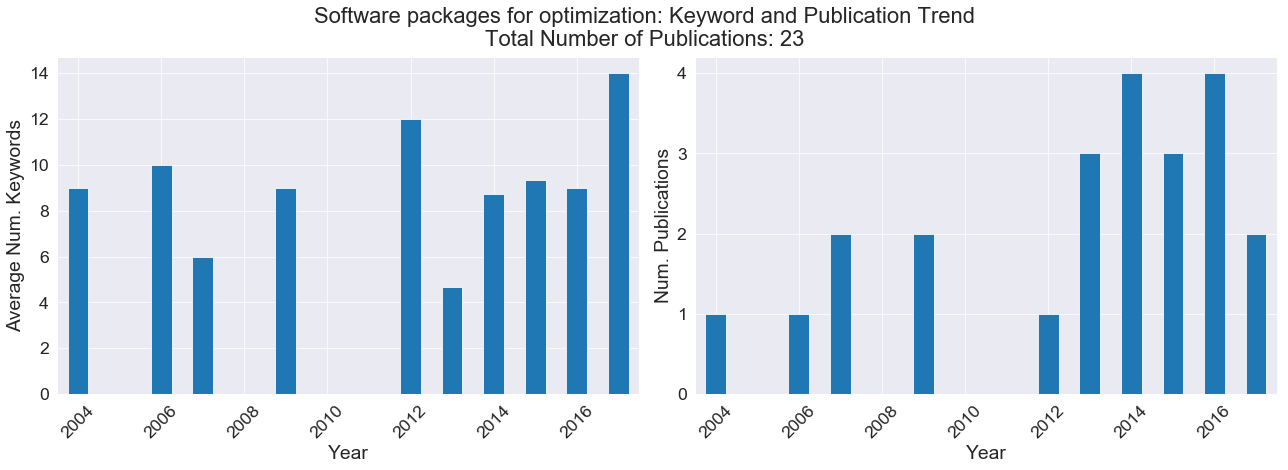

In [20]:
wos_plot.plot_kw_trend(all_optimization, title='Software packages for optimization: Keyword and Publication Trend', \
                       save_plot_fn='{}/opti_pub_trend.png'.format(FIG_DIR))

In [21]:
all_uq.name = 'UQ'
all_sa.name = 'SA'
#all_optimization.name = 'Optimization'

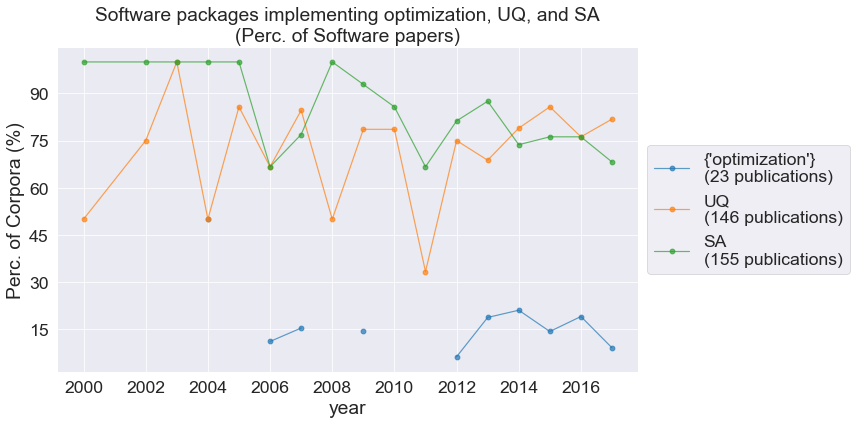

In [22]:
wos_plot.plot_topic_trend([all_optimization, all_uq, all_sa], total_rc=software_rc, 
                          title='Software packages implementing optimization, UQ, and SA\n(Perc. of Software papers)', 
                          save_plot_fn='{}/software_uasa_topics_keyword_trend_percentage.png'.format(FIG_DIR))

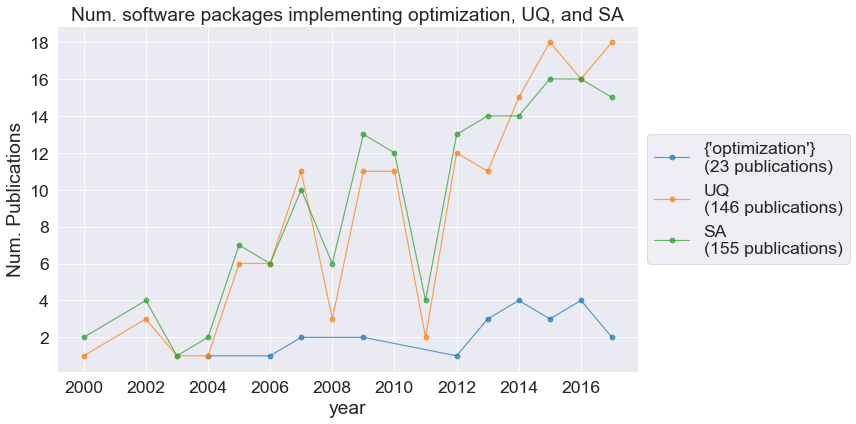

In [23]:
wos_plot.plot_topic_trend([all_optimization, all_uq, all_sa], 
                          title='Num. software packages implementing optimization, UQ, and SA', 
                          save_plot_fn='{}/software_uasa_topics_keyword_trend.png'.format(FIG_DIR))

<hr> Running a key-phrase extraction on UA/SA/optimization to identify the fields using this software.

In [24]:
uq_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_uq))

In [25]:
uq_phrases.display_phrases()

The Data Uncertainty Engine (DUE): A software tool for assessing and simulating uncertain environmental variables (2007) 
https://dx.doi.org/10.1016/j.cageo.2006.06.015 

bird counts) and categorical variables (e.g. 

Data may be imported into DUE from file or from a database, and are represented in DUE as objects whose positions and attribute values may be uncertain. 

rainfall), discrete numerical variables (e.g. 

Attributes supported by DUE include continuous numerical variables (e.g. 

Objects supported by DUE include spatial vectors, spatial rasters, time-series of spatial data, simple time-series and objects that are constant in space and time. 


Scalable subsurface inverse modeling of huge data sets with an application to tracer concentration breakthrough data from magnetic resonance imaging (2016) 
https://dx.doi.org/10.1002/2015WR018483 

In this paper, we extend PCGA to handle a large number of measurements (e.g.,  or more) by constructing a fast preconditioner whose comput

Such an outcome provided important information about the advantages and limitations of the models' structure. 

The software MICA was adopted, in which the prior information about the parameters is updated to generate the parameter posterior distribution. 

The likelihood function adopted in MICA assumes that the residuals between the measured and modelled values have a normal distribution. 

This study compares the results from three different scenarios: (i) when normality of the residuals was checked but if they were not normal then nothing was done (unverified); (ii) normality assumption was checked, verified (using data transformations) and a weighting strategy was used that gives more importance to high flows; and (iii) normality assumption was checked and verified, but no weights were applied. 


A model-independent Particle Swarm Optimisation software for model calibration (2013) 
https://dx.doi.org/10.1016/j.envsoft.2013.01.004 

This work presents and illustrates the applicati

The performed probabilistic analysis enables to investigate uncertainty and failure rates of pipelines when age-dependence is significant and when it is not relevant. 

The related work includes performance of the following tasks: to study gas pipeline combustion model, to identify uncertainty of model inputs noting their variation range, and to apply uncertainty and sensitivity analysis for results of this model. 

The rupture of a high-pressure natural gas pipeline can lead to consequences that can pose a significant threat to people and property in the close vicinity to the pipeline fault location. 

For this purpose, authors present available statistical information and probabilistic analysis related to failures of natural gas pipelines. 

The measures of uncertainty and sensitivity analysis were estimated and outcomes presented applying software system for uncertainty and sensitivity analysis. 


Non-stationary extreme value analysis in a changing climate (2014) 
https://dx.doi.or

Uncertainty of groundwater model predictions has in the past mostly been related to uncertainty in the hydraulic parameters, whereas uncertainty in the geological structure has not been considered to the same extent. 

In the second scenario the same  geological models were subjected to model optimization, where the hydraulic parameters for each of them were estimated by calibration against observations of hydraulic head and stream discharge. 

In the third scenario each geological model was run with  randomized sets of parameters. 

The analysis documented that the uncertainty on the conceptual geological model was as significant as the uncertainty related to the embedded hydraulic parameters. 

Recent developments in theoretical methods for quantifying geological uncertainty have made it possible to consider this factor in groundwater modeling. 


SEVIRI PrePro: A novel software tool for the pre-processing of SEVIRI geostationary orbit EO data products (2016) 
https://dx.doi.org/10.1

A long-term sensitivity analysis of the denitrification and decomposition model (2013) 
https://dx.doi.org/10.1016/j.envsoft.2013.01.005 

We used a method of Bayesian analysis of computer code outputs (BACCO) with the Gaussian emulation machine for sensitivity analysis software (GEM-SA) to conduct a long-term SA of DNDC for predicting the annual change of soil organic carbon (dSOC), nitrous oxide emission (NO) and grain yield of spring wheat. 

Twenty seven non-weather input parameters with wide ranges were selected for SA using weather data recorded from Three Hills, Alberta over  years (-). 

In the second step of BACCO GEM-SA there were only three (in the case of dSOC) and six (in the cases of NO and yield) input parameters whose influence contributed to more than % of the total output variances by their total effects. 

This indicates that a single year SA may overestimate or underestimate a long-term parameter effect on the model prediction. 

Most of the  input parameters contri

The accuracy of the optimised parameters was assessed against experimental data from a second lab-scale reactor treating EC effluent with an additional carbon source (molasses). 

It was concluded that the model predicted reasonably the dynamic behaviour of the anaerobic reactor under different loading rates. 


Multi-scale equation of state computations for confined fluids (2017) 
https://dx.doi.org/10.1016/j.compchemeng.2017.05.028 

() is used to determine internal energies of departure for mixtures, U-M(D), in confined spaces and compared to U-M(D) from direct NVT Monte Carlo simulation. 

The sensitivity of the mixture energy parameter, a(M), for the Gibbs-Helmholtz constrained (GHC) equation, confined fluid molar volume, V-M, and bubble point pressure are studied as a function of uncertainty in U-M(D). 

Canonical (NVT) Monte Carlo simulations are used to determine internal energies of departure of pure fluids using the RASPA software system (Dubbeldam et al., ). 


Modelling nit

An interface has been incorporated into this algorithm to allow a graphic visualisation of the effects that are produced when modifications of the model are carried out. 


A comprehensive evaluation of various sensitivity analysis methods: A case study with a hydrological model (2014) 
https://dx.doi.org/10.1016/j.envsoft.2013.09.031 

For the Sobol' method, the minimum samples needed are  to compute the first-order and total sensitivity indices correctly. 

(C)  The Authors. 

All SA methods are tested using a variety of sampling techniques to screen out the most sensitive (i.e., important) parameters from the insensitive ones. 

Morris One-At-a-Time (MOAT) screening is the most efficient, needing only  samples to identify the most important parameters, but it is the least robust method. 

We use a newly developed software package, a Problem Solving environment for Uncertainty Analysis and Design Exploration (PSUADE), to evaluate the effectiveness and efficiency of ten widely used SA

It also evaluates ImageJ program for automated seed counting using macro containing RenyiEntropy threshold algorithm. 

Digital images of cereal crop seeds were acquired i.e. 


Controlling setup cost in (Q, r, L) inventory model with defective items (2010) 
https://dx.doi.org/10.1016/j.apm.2009.04.010 

Finally we develop two computational algorithms to obtain the optimal ordering policy, A computer code using the software Matlab is developed to derive the optimal solution and present numerical examples to illustrate the models. 

This study discusses a mixture inventory model with back orders and lost sales in which the order quantity, reorder point, lead time and setup cost are decision variables. 

Additionally, sensitivity analysis is conducted with respect to the various system parameters. 


Sensitivity testing of a model for exploring water resources utilisation and management options (2005) 
https://dx.doi.org/10.1016/j.envsoft.2004.09.011 

The toolbox was developed for appli

https://dx.doi.org/10.1007/s10665-016-9848-8 

Finally, we present a synthetic experiment studying the variance-based sensitivity of the wave load on an offshore structure to a number of input uncertainties. 

These methods allow us to accurately and efficiently estimate the probability distribution of the solution and require only the computation of the solution at different points in the parameter space, allowing for the reuse of existing simulation software. 

The model is analyzed using random sampling techniques and nonintrusive methods based on generalized polynomial chaos (PC). 

A major challenge in next-generation industrial applications is to improve numerical analysis by quantifying uncertainties in predictions. 

We revisit experimental benchmarks often used for validation of deterministic water wave models. 


Utility of dynamic-landscape metapopulation models for sustainable forest management (2005) 
https://dx.doi.org/10.1111/j.1523-1739.2005.00276.x 

We wrote new softw

Further, our study demonstrated that an uncertainty analysis of model predictions is easily accomplished due to the low computational demand of the models and efficient calibration software and is absolutely worth the additional investment. 

Therefore, we established a snowmelt model calibration dataset that is both temporally dense and represents the integrated snowmelt infiltration signal for the Vers Chez le Brandt research catchment, which functions as a rather unique natural lysimeter. 

Lastly, development of a systematic instrumentation that evaluates the distributed, temporal evolution of snowpack drainage is vital for optimal understanding and management of cold-climate hydrologic systems. 

This is extremely important because the rate and timing of snowpack drainage has substantial consequences to aquifer recharge patterns, which in turn affect groundwater availability throughout the rest of the year. 

We then evaluated the uncertainty associated with the degree-day, a modi

The boundary-quality penalty: a quantitative method for approximating species responses to fragmentation in reserve selection (2007) 
https://dx.doi.org/10.1111/j.1523-1739.2006.00625.x 

We implemented the BQP in the context of the Zonation method, but it could as well be implemented into any other spatially explicit reserve-planning framework. 

Therefore, many reserve-design methods use qualitative heuristics, such as distance-based criteria or boundary-length penalties to induce reserve aggregation. 

We devised a quantitative method that introduces aggregation into reserve networks. 

The BQP can be estimated for any habitat model that includes neighborhood (connectivity) effects, and it can be introduced into reserve selection software in a standardized manner We used the BQP in a reserve-design case study of the Hunter Valley of southeastern Australia. 


Scenario-based simulation of runoff-related pesticide entries into small streams on a landscape level (2005) 
https://dx.doi.

Results showed that the Penman (Proc R Soc Lond Ser A Math Phys Sci :-, ) FAO- Penman-Monteith,  Kpen equation (combination equations), the  Makkink, Priestley-Taylor equation (radiation based equation), and the  Hargreaves equation had a good overall rank. 

Using the six selected equations, seasonal analysis was conducted and evaluated using the bias and RMSE. 

In this study,  different equations provided in the Reference Evapotranspiration Calculator Software (REF-ET) were utilized for estimating ETref with GLDAS and point scale data collected at  observation sites in the Korean Peninsula during . 


Hardware and software efficacy in assessment of fine root diameter distributions (2008) 
https://dx.doi.org/10.1016/j.compag.2007.08.002 

Due to the  px mm- resolution ceiling with currently available scanners, the smallest roots for which this level of discrimination is possible is .mm diameter. 

A sensitivity analysis of several software programs capable of providing root diameter 

The top % of priority areas contained over % of red-listed species locations and % of existing protected forest areas, but only % of these top priorities overlapped with core areas identified previously in a regional strategy that used more qualitative methods. 

As a contribution to meeting the challenge posed by Countdown , we developed a spatially explicit conservation-planning exercise that used regional knowledge on forest biodiversity to provide support for managers attempting to halt further loss of biological diversity in the region. 

Effective management of biodiversity in production landscapes requires a conservation approach that acknowledges the complexity of ecological and cultural systems in time and space. 


Accelerating Monte Carlo estimation with derivatives of high-level finite element models (2017) 
https://dx.doi.org/10.1016/j.cma.2017.01.041 

We find similar trends when comparing with a modern non-intrusive multi-level polynomial chaos expansion method. 

A comp

Frequently updated maps of snow conditions are useful for many applications, e.g., for avalanche and flood forecasting services, hydropower energy situation analysis, as well as for the general public. 


Synergies between biodiversity conservation and ecosystem service provision: Lessons on integrated ecosystem service valuation from a Himalayan protected area, Nepal (2016) 
https://dx.doi.org/10.1016/j.ecoser.2016.05.003 

The Toolkit for Ecosystem Service Site-based Assessment (TESSA) was used to compare ecosystem services between two alternative states of the site (protection or lack of protection with consequent changed land use) to estimate the net consequences of protection. 

We estimated that lack of protection would have substantially reduced the annual ecosystem service flow, including a % reduction in the value of greenhouse gas sequestration, % reduction in carbon storage, % reduction in nature-based recreation, and % reduction in water quality. 


Modeling and quantitativ

Additionally, in order to reduce the number of experiments and determine the dependency of our model against Cloud resource and workflow parameters, the conducted comprehensive sensitivity analysis shows that the correctness of our model is independent of workflow parallel section size. 

However, the ideal simulated environment produces the same output for the same workflow schedule and input parameters and thus can not reproduce the Cloud variant behavior. 

We determine the minimum amount of data that needs to be collected or minimum number of test cases that needs to be repeated for each experiment in order to get less than % inaccuracy for our noising parameter. 


UNCERTAINTY QUANTIFICATION IN DAMAGE MODELING OF HETEROGENEOUS MATERIALS (2013) 
https://dx.doi.org/10.1615/IntJMultCompEng.2013005821 

The epistemic and aleatory uncertainties inherent in the model prediction due to model parameter uncertainty, model form error, solution approximations, and measurement errors are inve

The toolbox now includes mathematical formulations for accumulation of pollutants during dry weather period and their wash-off during rainfall events. 

Numerical and computational modelling of flow and pollutant dynamics in urban drainage systems is becoming more and more integral to planning and design. 


Simulation model for extended double-ended queueing (2010) 
https://dx.doi.org/10.1016/j.cie.2010.04.002 

In some cases bulk arrivals may come at the same time, and pairing is not always guaranteed. 

Inter-arrival time may follow distributions other than exponential. 

The purpose of this paper is to extend traditional double-ended queuing models using a simulation approach. 

Inter-arrival time is assumed to follow an exponential distribution, with arrivals to the system assumed to occur just one at a time. 

Traditional double-ended queuing models assume that one supply queue should satisfy one demand queue through instantaneous pairing. 


A Practical, Robust Methodology for A

In [26]:
sa_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_sa))

In [27]:
sa_phrases.display_phrases()

The Data Uncertainty Engine (DUE): A software tool for assessing and simulating uncertain environmental variables (2007) 
https://dx.doi.org/10.1016/j.cageo.2006.06.015 

bird counts) and categorical variables (e.g. 

Data may be imported into DUE from file or from a database, and are represented in DUE as objects whose positions and attribute values may be uncertain. 

rainfall), discrete numerical variables (e.g. 

Attributes supported by DUE include continuous numerical variables (e.g. 

Objects supported by DUE include spatial vectors, spatial rasters, time-series of spatial data, simple time-series and objects that are constant in space and time. 


Scalable subsurface inverse modeling of huge data sets with an application to tracer concentration breakthrough data from magnetic resonance imaging (2016) 
https://dx.doi.org/10.1002/2015WR018483 

In this paper, we extend PCGA to handle a large number of measurements (e.g.,  or more) by constructing a fast preconditioner whose comput

In this process, the effectiveness and efficiency of the scenario B is analyzed and assessed. 

Besides highlighting the significance of the financial dimension and its integration with the operational dimension in gaining sustainable competitive advantage, the research results revealed that CVM- in contrast to change in equity and EVA- is much more favorable than the other objectives. 

To test the model, data of an Iranian petrochemical company are used. 

In this process, the aforementioned dimensions are extended and integrated in mathematical modeling framework. 


ODM: an analytical solution-based tool for reacting oxygen diffusion modelling in mine spoils (2017) 
https://dx.doi.org/10.1007/s12665-017-6389-z 

A simple one-dimensional analytical solution is presented to model oxygen diffusion through the pore space of mine spoils containing pyrite. 

This tool can be used to model transport of oxygen through the mine spoils either with or without a cap. 

Results of several simul

In particular, the mathematical model considers the decision of how many plants and distribution centers to open and where to open them, as well as the allocation in each echelon. 

The LINGO software is used to solve the model for some problem cases. 

We examine a multiechelon supply chain that includes suppliers, plants, and distribution centers and develop a mathematical model that aims at minimizing the total cost of the supply chain. 


Parameterization, sensitivity analysis, and inversion: an investigation using groundwater modeling of the surface-mined Tivoli-Guidonia basin (Metropolitan City of Rome, Italy) (2016) 
https://dx.doi.org/10.1007/s10040-016-1393-z 

In this work, ground-water model calibration starts with a simple parameterization that evolves into a moderately complex model. 

With respect to model parameterization and sensitivity analysis, this work uses a practical example to suggest that methods that start with simple models and use computationally frugal model

Furthermore, SAFE includes numerous visualisation tools for the effective investigation and communication of GSA results. 

Global Sensitivity Analysis (GSA) is increasingly used in the development and assessment of environmental models. 

All methods implemented in SAFE support the assessment of the robustness and convergence of sensitivity indices. 


Optimization of biofiltration for odor control: Model development and parameter sensitivity (2002) 
https://dx.doi.org/10.2175/106143002X139703 

The model simulations showed that the existence of a water layer surrounding the biofilm in a biofiltration unit lowers the removal efficiency of hydrogen sulfide. 

A dynamic model that describes the mass transport and attenuation of odor-causing air emissions (i.e., hydrogen sulfide and other reduced sulfur compounds) in a biofiltration unit was developed and incorporated into a software package called Biofilter(TM). 

Model equations were converted to ordinary differential equations using o

Through a graphical user interface, one can map a set of realizations and forward transfer function responses into a multidimensional scaling (MDS) space where visualization utilities, and clustering techniques are available. 

This paper presents SGEMS-UQ a plugin for the SGEMS platform, that is used to perform distance-based uncertainty analysis on geostatistical simulations, and the resulting forward transfer function responses used in subsurface modeling and engineering. 

Finally, we illustrate the versatility of the code-base on an application of modeling uncertainty in reservoir forecasts for an oil reservoir in the West Coast of Africa. 

Once mapped in the MDS space, the user can explore linkage between simulation parameters and forward transfer function responses using a module based on a SQL database. 


Uncertainty analysis for estimation of landfill emissions and data sensitivity for the input variation (2010) 
https://dx.doi.org/10.1007/s10584-010-9919-1 

Landfills are t

In the established dynamic environmental transfer model ETM- with compartmental structure, the principal pathways of vegetable contamination were studied specifically for the Hungarian environment. 

As result of the modeling the variation of activity-concentration with time was obtained in the compartments. 

A sensitivity analysis of the input parameters was also carried out and the parameters were categorized by their sensitivity index (SI). 


Nitrous Oxide Emissions from Cropland: a Procedure for Calibrating the DayCent Biogeochemical Model Using Inverse Modelling (2013) 
https://dx.doi.org/10.1007/s11270-013-1677-z 

The aim of this study is to establish and demonstrate a procedure for calibration of DayCent to improve estimation of GHG emissions. 

Crop year  data were used for model calibration and  data were used for validation. 

The DayCent model was analysed and calibrated using NO flux data collected over  years at the Iowa State University Agronomy and Agricultural Engine

The BMP Toolbox model was successfully applied, and a process for evaluating the long-term operation of structural BMP sites was established. 


Assessing the impact of managed-care on the distribution of length-of-stay using Bayesian hierarchical models (2000) 
https://dx.doi.org/10.1023/A:1009691326989 

In this paper, Bayesian inference through Markov Chain Monte Carlo methods is used for the analysis of a complex hierarchical log-normal model that shows the impact of a managed care strategy aimed at limiting length of hospital stays. 


A computer program for a Monte Carlo analysis of sensitivity in equations of environmental modelling obtained from experimental data (2002) 
https://dx.doi.org/10.1016/S0965-9978(02)00023-6 

The authors consider that it is useful to obtain new parameters that relate the sensitivity of the equations to the variations that are produced by the experimental data. 

On the other hand, they discuss a computing algorithm that allows the analysis of sensit

https://dx.doi.org/10.1016/j.buildenv.2008.11.012 

Illuminance was used as the output variable. 

A prediction model was developed to determine daylight illuminance for the office buildings by using artificial neural networks (ANNs). 

In ANN modeling, the data were divided into two groups; the first  of these data sets were used for training and the remaining  for testing. 

The model was then subjected to sensitivity analysis to determine the relationship between the input and output variables. 

Researchers and designers will benefit from this model in daylighting performance assessment of buildings by making predictions and comparisons and in the daylighting design process by determining illuminance. 


Data-driven sensitivity analysis to detect missing data mechanism with applications to structural equation modelling (2013) 
https://dx.doi.org/10.1080/00949655.2012.660486 

Current sensitivity analysis methods primarily assume a model for the response mechanism in conjunction wit

Traffic Parameters Estimation to Predict Road Side Pollutant Concentrations using Neural Networks (2009) 
https://dx.doi.org/10.1007/s10666-007-9129-z 

In this area, various loop detectors and one pollution-monitoring site were located. 

Finally, after a sensitivity analysis, it was showed that queues length were the mostly correlated traffic parameters to pollutant concentrations. 


Utility of dynamic-landscape metapopulation models for sustainable forest management (2005) 
https://dx.doi.org/10.1111/j.1523-1739.2005.00276.x 

We wrote new software to bell) quantify the contribution of landscape stochasticity to model prediction uncertainty. 

We used the Brown Creeper (Certhia americana) in the boreal forests of northern Ontario as a case study. 

Primary concerns about the method are the practical difficulties associated with incorporating fire stochasticity in prediction uncertainty and the number of model assumptions that must be made and tested with sensitivity analysis. 

For

Statistical inference is based on the assumption that data are missing completely at random or missing at random. 

Importantly, whether or not data are missing is assumed to be independent of the missing data. 

Missing data are common in studies that rely on multiple informant data to evaluate relationships among variables for distinguishable individuals clustered within groups. 

Estimation of structural equation models using raw data allows for incomplete data, and so all groups can be retained for analysis even if only  member of a group contributes data. 


A Computational Fluid Dynamic Model for Prediction of Organic Dyes Adsorption from Aqueous Solutions (2012) 
https://dx.doi.org/10.1007/s10666-012-9310-x 

The experimental results presented in this study and taken from the literature for the removal of synthetic dyes were compared with those results predicted by the numerical model. 

This effect is most obvious at the early stages of the adsorption process when the rate of d

We find dramatic differences between simulation and emulation results for DoS experiments. 

As a case study, we consider low-rate TCP-targeted DoS attacks. 

We design constructs and tools for emulation testbeds to achieve a level of control comparable to simulation tools. 


Scenario-based simulation of runoff-related pesticide entries into small streams on a landscape level (2005) 
https://dx.doi.org/10.1016/j.ecoenv.2005.04.012 

In this paper, we present a simulation tool for the simulation of pesticide entry from arable land into adjacent streams. 

We simulated the pesticide entry on the landscape level at  sites in small streams situated in the central lowland of Germany with winter wheat, barley, and sugar beat as the main agricultural. 

We used the ratio of exposure to toxicity (REXTOX) model proposed by the OECD, which had been successfully validated in the study area as part of a previous study and which was extended to calculate pesticide concentrations in adjacent stream

Determination of the overlap factor and its enhancement for medium-size tropospheric lidar systems: a ray-tracing approach (2013) 
https://dx.doi.org/10.1117/1.JRS.7.073591 

The ray-tracing approach presented here is straightforward and a comparatively much simpler solution than analytical-based methods. 

Parametric simulations are carried out to show that both approaches are coincident. 

The method revisits both detector and fiber optics coupling alternatives at the telescope focal-plane along with the insertion of a field lens. 


The decision model of task allocation for constrained stochastic distributed systems (2010) 
https://dx.doi.org/10.1016/j.cie.2009.04.004 

By viewing each module as a state in the Markov process, we build a task allocation decision model to maximize DSR for distributed systems with % reliable network. 

In this model, the DSR is derived from the module software reliabilities, the processor hardware reliabilities, the transition probabilities between mod

The overall objective of this research is to examine the sensitivity of neuro-fuzzy models used to predict groundwater vulnerability in a spatial context by integrating GIS and neuro-fuzzy techniques. 

Compared to bell-shaped and triangular-shaped membership functions, the neuro-fuzzy models with a trapezoidal membership function were the least sensitive to the various permutations and combinations of the learning and validation parameters. 

The sensitivity analysis showed that neuro-fuzzy models were sensitive to the shape of the fuzzy sets, number of fuzzy sets, nature of the rule weights, and validation techniques used during the learning processes. 


MEDOR, a didactic tool to support interpretation of bioassay data after internal contamination by actinides (2007) 
https://dx.doi.org/10.1093/rpd/ncm288 

Its main purpose is to evaluate the pertinence of the application of different models. 

This paper describes its first version that is focused on inhalation exposure to actinide

The Toolkit for Ecosystem Service Site-based Assessment (TESSA) was used to compare ecosystem services between two alternative states of the site (protection or lack of protection with consequent changed land use) to estimate the net consequences of protection. 

We estimated that lack of protection would have substantially reduced the annual ecosystem service flow, including a % reduction in the value of greenhouse gas sequestration, % reduction in carbon storage, % reduction in nature-based recreation, and % reduction in water quality. 


Addressing ten questions about conceptual rainfall-runoff models with global sensitivity analyses in R (2013) 
https://dx.doi.org/10.1016/j.jhydrol.2013.08.047 

The length of data period required to characterize the sensitivities assuredly is a minimum of five years. 

Results presented demonstrate the sensitivity of four target functions to parameter variations of four rainfall runoff models of varying complexity (- parameters). 

Sensitivity anal

We determine the minimum amount of data that needs to be collected or minimum number of test cases that needs to be repeated for each experiment in order to get less than % inaccuracy for our noising parameter. 


MINFIT: A Spreadsheet-Based Tool for Parameter Estimation in an Equilibrium Speciation Software Program (2016) 
https://dx.doi.org/10.1021/acs.est.6b03399 

Although there are existing tools available, the steep learning curve prevents the wider community of environmental engineers and chemists to adopt those tools. 

We developed interactive interfaces so that the optimization processes are transparent. 


UNCERTAINTY QUANTIFICATION IN DAMAGE MODELING OF HETEROGENEOUS MATERIALS (2013) 
https://dx.doi.org/10.1615/IntJMultCompEng.2013005821 

The epistemic and aleatory uncertainties inherent in the model prediction due to model parameter uncertainty, model form error, solution approximations, and measurement errors are investigated. 


Comparative study on simulation performan

Modeling of radionuclide transport through repository components using finite volume finite element and multidomain methods (2008) 
https://dx.doi.org/10.1016/j.pce.2008.10.041 

On the contrary, the migration and release at the host rock exits of ()I, which is a non-sorbed and soluble radionuclide, is shown to be influenced by the radionuclide source term, i.e. 

IRSN calculations based on the French "spent fuel/iron canister/clay" concept designed by Andra in the framework of its feasibility study of a deep geological repository are then presented. 

This paper presents D saturated flow and transport calculations performed using numerical methods developed within the MELODIE software in the framework of assessing the performance of a radioactive waste geological repository. 

This type of computational modeling is a challenging task due to the presence of strong physical, chemical and hydrogeological heterogeneities, as well as the very different geometrical scales (from dm to km) to

Stochastic modeling may help provide uncertainty quantification and also add robustness to the analysis by means of probabilistic forecasts. 

A Monte Carlo simulation, based on a coupled flow and transport groundwater D model, has been carried out to propagate the hydraulic conductivity parameter uncertainty to groundwater model outputs, namely pressure head and salt concentration. 




In [28]:
opt_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_optimization))

In [29]:
opt_phrases.display_phrases()

Estimates of plant density of wheat crops at emergence from very low altitude UAV imagery (2017) 
https://dx.doi.org/10.1016/j.rse.2017.06.007 

The application of the method on the  samples available over the three sites provides a RMSE and relative RMSE on estimates of . 

The current limits and possible improvements of the method proposed are finally discussed. 

Images were then projected on the ground surface to finally extract subsamples used to estimate the plant density. 

plants/m() and .% with a bias of . 

Plants should have between one to two leaves when images are taken. 


The comparison of four dynamic systems-based software packages: Translation and sensitivity analysis (2006) 
https://dx.doi.org/10.1016/j.envsoft.2005.07.009 

We found expression-based models such as Simulink and GoldSim with Expressions were able to model the SWEB more accurately; however, stock and flow-based models such as STELLA, Madonna, and GoldSim with Flows provided the user a better conceptual

Pi 4U: A high performance computing framework for Bayesian uncertainty quantification of complex models (2015) 
https://dx.doi.org/10.1016/j.jcp.2014.12.006 

The optimization tasks associated with the asymptotic approximations are treated via the Covariance Matrix Adaptation Evolution Strategy (CMA-ES). 

The framework accommodates scheduling of multiple physical model evaluations based on an adaptive load balancing library and shows excellent scalability. 

In addition to the software framework, we also provide guidelines as to the applicability and efficiency of Bayesian tools when applied to computationally demanding physical models. 


Interactive software for material parameter characterization of advanced engineering constitutive models (2004) 
https://dx.doi.org/10.1016/j.advengsoft.2004.03.010 

The procedure is automated through the integrated software COMPARE (Constitutive Material PARameter Estimator) that enables the determination of an 'optimum' set of material parameters

Results show that the DETRANSPFE model outperforms the GA- and HS-based models in terms of the network performance index and the computational time required. 

In this model, the TRANSYT traffic simulation software is combined with Differential Evolution (DE) optimization algorithm, which is based on the natural selection paradigm. 

The solution of the bilevel EQND problem is carried out by the proposed Differential Evolution and TRANSYT with PFE, the so-called DETRANSPFE model, on a well-known signal controlled test network. 


Parameter estimation and uncertainty analysis for a watershed model (2007) 
https://dx.doi.org/10.1016/j.envsoft.2006.06.007 

This paper explores the use of three such methods, and compares their performance when used in conjunction with a lumped parameter model for surface water flow (HSPF) in a large watershed. 

As well as this, they can provide the modeler with valuable qualitative information on the shape of parameter and predictive probability distribut

<hr> Top-cited journals for UA/SA/optimization
<br> - Original intention was to find top cited for each three collections, but there was significant overlap, so just ran the analysis on the entire refined_software collection

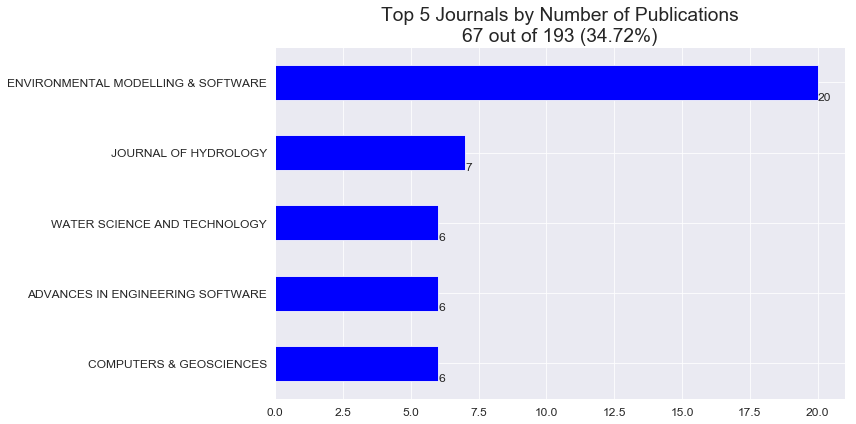

In [30]:
wos_plot.plot_pubs_per_journal(software_rc, top_n=5, annotate=True, show_stats=True, 
                               save_plot_fn='{}/software2_journal_pubs.png'.format(FIG_DIR))

In [31]:
journals_of_interest_software = list(map(str.upper, ['Environmental Modelling & Software', 'Journal of Hydrology', 
                                                     'Computers & Geosciences', 'Water Science and Technology', 
                                                     'Advances in Engineering Software']))

pubs_for_journals_software = wosis.find_pubs_by_journal(software_rc, journals_of_interest_software)

In [35]:
# Get citations for each paper
paper_citations_per_journal_software = {}
for journal in pubs_for_journals_software:
    fn = '{}/collection_software_{}_2019-03-08'.format(TMP_DIR, journal)
    paper_citations_per_journal_software[journal] = wosis.get_num_citations(pubs_for_journals_software[journal], 
                                                                            WOS_CONFIG,
                                                                            cache_as=fn)

In [37]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_software = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_software.items():
    df = wosis.link_to_pub(df)
    df['journal'] = df['SO']
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)

    collection_software = collection_software.append(df[cols_of_interest][0:10], ignore_index=True)

In [39]:
top_cited_in_top_journals_software = collection_software.sort_values('citations', ascending=False)
top_cited_in_top_journals_software.head(10)

,AU,year,title,journal,citations,DOI link
20,"Ziehn, T|Tomlin, AS",2009,GUI-HDMR - A software tool for global sensitiv...,ENVIRONMENTAL MODELLING & SOFTWARE,121,https://dx.doi.org/10.1016/j.envsoft.2008.12.002
19,"Gallagher, M|Doherty, J",2007,Parameter estimation and uncertainty analysis ...,ENVIRONMENTAL MODELLING & SOFTWARE,121,https://dx.doi.org/10.1016/j.envsoft.2006.06.007
6,"Dixon, B",2005,Applicability of neuro-fuzzy techniques in pre...,JOURNAL OF HYDROLOGY,100,https://dx.doi.org/10.1016/j.jhydrol.2004.11.010
21,"Pianosi, F|Sarrazin, F|Wagener, T",2015,A Matlab toolbox for Global Sensitivity Analysis,ENVIRONMENTAL MODELLING & SOFTWARE,99,https://dx.doi.org/10.1016/j.envsoft.2015.04.009
29,"Vu-Bac, N|Lahmer, T|Zhuang, X|Nguyen-Thoi, T|R...",2016,A software framework for probabilistic sensiti...,ADVANCES IN ENGINEERING SOFTWARE,98,https://dx.doi.org/10.1016/j.advengsoft.2016.0...
22,"Landuyt, D|Broekx, S|D'hondt, R|Engelen, G|Aer...",2013,A review of Bayesian belief networks in ecosys...,ENVIRONMENTAL MODELLING & SOFTWARE,96,https://dx.doi.org/10.1016/j.envsoft.2013.03.011
23,"Wagener, T|Kollat, J",2007,Numerical and visual evaluation of hydrologica...,ENVIRONMENTAL MODELLING & SOFTWARE,87,https://dx.doi.org/10.1016/j.envsoft.2006.06.017
0,"Cannavo, F",2012,Sensitivity analysis for volcanic source model...,COMPUTERS & GEOSCIENCES,77,https://dx.doi.org/10.1016/j.cageo.2012.03.008
24,"Gan, YJ|Duan, QY|Gong, W|Tong, C|Sun, YW|Chu, ...",2014,A comprehensive evaluation of various sensitiv...,ENVIRONMENTAL MODELLING & SOFTWARE,76,https://dx.doi.org/10.1016/j.envsoft.2013.09.031
25,"Harmel, RD|Smith, DR|King, KW|Slade, RM",2009,Estimating storm discharge and water quality d...,ENVIRONMENTAL MODELLING & SOFTWARE,66,https://dx.doi.org/10.1016/j.envsoft.2008.12.006


In [40]:
top_cited_in_top_journals_software.to_csv('{}/top_cited_software_papers.csv'.format(DATA_DIR))

<hr> Searching a criteria match for areas which are applying these software packages, then using key-phrase extraction to identify whether the packages are being used for UA, SA, or optimization.

In [35]:
criteria = {
    'policy': set(['policy', 'adapt', 'decision support', 'management', 'gis']),
    'agri': set(['agricultur', 'farm']),
    'water': set(['hydrology', 'water', 'stream', 'aquifer']),
    'enviro': set(['environment', 'climate', 'ecology', 'ecosystem', 'biodivers', 'conservation']),
    'socio_economic': set(['ecosystem service', 'social', 'conflict', 'particip', 'law', 'stakehold', 'policy', 'economic']),
    'risk': set(['risk', 'risk management', 'hazard', 'control']),
    'medicine': set(['infection', 'disease', 'injury', 'medicine', 'cancer', 'treatment', 'health']),
    'chemistry': set(['chem', 'reaction', 'catalyst', 'isotope'])
}

crit_matches = wosis.keyword_matches_by_criteria(software_rc, criteria, threshold=95.0)

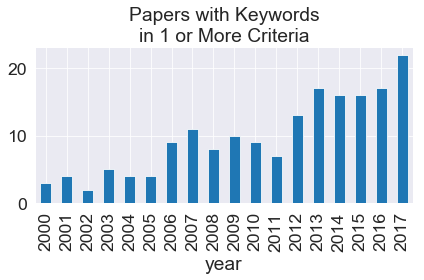

In [36]:
criteria_df = wosis.collate_keyword_criteria_matches(software_rc, crit_matches)
wos_plot.plot_criteria_trend(criteria_df, threshold=1)

In [37]:
policy = wosis.keyword_matches(software_rc, ['policy', 'adapt', 'decision support', 'management', 'gis'], threshold=95.0)

In [38]:
all_policy = policy.combine_recs()

In [39]:
policy_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_policy))

In [40]:
policy_phrases.display_phrases()

Sensitivity of population viability to spatial and nonspatial parameters using grip (2008) 
https://dx.doi.org/10.1890/07-1306.1 

We evaluated GRIP's performance as a tool for sensitivity analysis of spatial PVAs and explored the consequences of varying spatial input parameters for predictions of a published PVA model of the sand lizard (Lacerta agilis). 

Sensitivity analyses of population viability analysis (PVA) models can help measure relative parameter influences on predictions, identify research priorities for reducing uncertainty, and evaluate management strategies. 

We provide annotated code so that GRIP may be modified to reflect particular species biology, customized for more complex spatial PVA models, upgraded to incorporate features added in newer versions of RAMAS Metapop, used as a template to develop similar programs, or used as it is for computationally efficient sensitivity analyses in support of conservation planning. 

We developed GRIP, a program to facilitate se

We further illustrate the application of hydroPSO in two real-world case studies: we calibrate, first, a hydrological model for the Ega River Basin (Spain) and, second, a groundwater flow model for the Pampa del Tamarugal Aquifer (Chile). 


Infiltration under snow cover: Modeling approaches and predictive uncertainty (2017) 
https://dx.doi.org/10.1016/j.jhydrol.2016.12.042 

Further, our study demonstrated that an uncertainty analysis of model predictions is easily accomplished due to the low computational demand of the models and efficient calibration software and is absolutely worth the additional investment. 

Therefore, we established a snowmelt model calibration dataset that is both temporally dense and represents the integrated snowmelt infiltration signal for the Vers Chez le Brandt research catchment, which functions as a rather unique natural lysimeter. 

Lastly, development of a systematic instrumentation that evaluates the distributed, temporal evolution of snowpack drainag

K/yr and an increase in precipitation of  mm/yr. 

Climatic conditions in Germany continued to change over the investigation period, with an increase in temperature of . 

The IWD for the investigated crops in the area of the current "Federal Republic of Germany" over the  years was  mm/yr, varying between  and  mm/yr. 

Thus, the influence of climate change on water resources is relativized which brings an important input into the debate. 

Policy and management measures to adapt to climate change are currently being debated in Germany. 


Effect of Temporal and Spatial Rainfall Resolution on HSPF Predictive Performance and Parameter Estimation (2012) 
https://dx.doi.org/10.1061/(ASCE)HE.1943-5584.0000457 

when a spatially averaged network of four rain gauges was used. 

This study evaluated the effect of temporal and spatial rainfall resolution on the predictive performance of Hydrological Simulation Program-Fortran (HSPF) using manual and automatic calibration procedures. 

Further


Assessing the impact of managed-care on the distribution of length-of-stay using Bayesian hierarchical models (2000) 
https://dx.doi.org/10.1023/A:1009691326989 

In this paper, Bayesian inference through Markov Chain Monte Carlo methods is used for the analysis of a complex hierarchical log-normal model that shows the impact of a managed care strategy aimed at limiting length of hospital stays. 


A Multi-Attribute Decision Analysis for Decommissioning Offshore Oil and Gas Platforms (2015) 
https://dx.doi.org/10.1002/ieam.1693 

It found a near-consensus of stakeholders in support of partial removal and "rigs-to-reefs" program. 

The  oil and gas platforms off the coast of southern California are reaching the end of their economic lives. 

The project's results played a role in the decision to pass legislation enabling an expanded California "rigs-to-reefs" program that includes a mechanism for sharing cost savings between operators and the state. 

As part of a larger policy analysi

In [41]:
agri = wosis.keyword_matches(software_rc, ['agricultur', 'farm'], threshold=95.0)

In [42]:
all_agri = agri.combine_recs()

In [43]:
agri_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_agri))

In [44]:
agri_phrases.display_phrases()

Life cycle assessment of corn-based ethanol production in Argentina (2014) 
https://dx.doi.org/10.1016/j.scitotenv.2013.11.012 

In Argentina, the legislation has imposed the use of biofuels in blend with fossil fuels ( to %) in the transport sector. 

As functional unit,  MJ of anhydrous ethanol at biorefinery is chosen. 

For refinery system, corn production, supplied heat and burned natural gas result in the higher contributions. 

The use of fertilizers and resources, seeds production, harvesting process, corn drying, and phosphorus fertilizers and acetamide-anillide-compounds production are the most relevant processes in agricultural system. 

SimaPro is the life cycle assessment software used. 


Integration of a Three-Dimensional Process-Based Hydrological Model into the Object Modeling System (2016) 
https://dx.doi.org/10.3390/w8010012 

The integration of a spatial process model into an environmental modeling framework can enhance the model's capabilities. 

This study serves 

In [45]:
water = wosis.keyword_matches(software_rc, ['hydrology', 'water', 'stream', 'aquifer'], threshold=95.0)

In [46]:
all_water = water.combine_recs()

In [47]:
water_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_water))

In [48]:
water_phrases.display_phrases()

The OECD software tool for screening chemicals for persistence and long-range transport potential (2009) 
https://dx.doi.org/10.1016/j.envsoft.2008.06.014 

We present the software implementation of The OECD P-OV & LRTP Screening Tool (The Tool) that is used to assess the environmental hazard of organic chemicals using metrics of overall persistence (P-OV) and long-range transport potential (LRTP). 

The Tool is designed to support decision making for chemical management and includes features that are recommended by the Organization for Economic Cooperation and Development (OECD) expert group on multimedia modeling. 

The effect of uncertainties in input properties describing chemicals can be assessed with a Monte Carol analysis. 

The software is evaluated and illustrated by comparing results from The Tool with those from other models and by evaluating four substances that are candidates for regulation or ban under the Stockholm convention on Persistent Organic Pollutants. 

The Tool 

The results, based on  iterations sampled from inputs distributions (foreground parameters, ecoinvent background data and market prices), showed a significant advantage of VFU technology, both at a small and decentralized scale and at a large and centralized scale (% confidence intervals not including zero values). 

The benefits mainly concern the production of fertilizers, the decreased efforts at the WWTP, the water savings from toilets flushing, as well as the lower infrastructure volumes if the WWTP is redesigned (in case of significant reduction of nutrients load in wastewater). 

Additionally, particular attention was given to the propagation and analysis of inputs uncertainties. 


Stochastic cost optimization of DNAPL remediation - Method description and sensitivity study (2012) 
https://dx.doi.org/10.1016/j.envsoft.2012.05.002 

Uncertainty in DNAPL source delineation was found to have a large effect on the cost and probability of achieving remediation objectives for thermal 

Calibration results showed a large variability in the model outputs in function of the initial conditions and demonstrated that the tested model predictive capacity is very low. 


Analyzing the effects of geological and parameter uncertainty on prediction of groundwater head and travel time (2013) 
https://dx.doi.org/10.5194/hess-17-3245-2013 

Uncertainty of groundwater model predictions has in the past mostly been related to uncertainty in the hydraulic parameters, whereas uncertainty in the geological structure has not been considered to the same extent. 

In the second scenario the same  geological models were subjected to model optimization, where the hydraulic parameters for each of them were estimated by calibration against observations of hydraulic head and stream discharge. 

In the third scenario each geological model was run with  randomized sets of parameters. 

The analysis documented that the uncertainty on the conceptual geological model was as significant as the uncert

Scalable subsurface inverse modeling of huge data sets with an application to tracer concentration breakthrough data from magnetic resonance imaging (2016) 
https://dx.doi.org/10.1002/2015WR018483 

In this paper, we extend PCGA to handle a large number of measurements (e.g.,  or more) by constructing a fast preconditioner whose computational cost scales linearly with the data size. 

Characterizing subsurface properties is crucial for reliable and cost-effective groundwater supply management and contaminant remediation. 

Only about  forward simulations in total were required to obtain the best estimate with corresponding estimation uncertainty, and the estimated K field captured key patterns of the original packing design, showing the efficiency and effectiveness of the proposed method. 

However, characterization with such a large amount of information requires prohibitive computational costs associated with "big data'' processing and numerous large-scale numerical simulations. 


I

With increasing pressures of a changing climate, urban growth and economic constraints, the need for wider spread integration is necessary in the interest of a sustainable future. 


Numerical Modelling of Waste Stabilization Ponds: Where Do We Stand? (2012) 
https://dx.doi.org/10.1007/s11270-012-1098-4 

In spite of its relative simplicity of design, operation and maintenance, the various processes taking place in WSP have not been entirely quantified. 

Furthermore, it is evident from the review of the different models that calibration and validation with full-scale WSP data is also scarce. 

This paper aims at filling this gap. 

Lately, modelling has served as an important, low-cost tool for a better description and an improved understanding of the system. 

In-depth study of the published models reveals a clear evolution over time in the concept of modelling, from just hydraulic empirical models to D ones and from simple first-order water quality models to complex ones which descr

In [49]:
enviro = wosis.keyword_matches(software_rc, ['environment', 'climate', 'ecology', 'ecosystem', 'biodivers', 'conservation'], threshold=95.0)

In [50]:
all_enviro = enviro.combine_recs()

In [51]:
enviro_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_enviro))

In [52]:
enviro_phrases.display_phrases()

Assessment of environmental impacts and operational costs of the implementation of an innovative source-separated urine treatment (2017) 
https://dx.doi.org/10.1016/j.watres.2017.09.016 

In order to tackle the lack of stable data from the pilot plant and the complex effects on wastewater treatment plant (WWTP), process simulation was coupled with LCA and costs assessment using the Python programming language. 

Five scenarios of VFU implementation were compared to the conventional treatment of  m() of wastewater. 

The results, based on  iterations sampled from inputs distributions (foreground parameters, ecoinvent background data and market prices), showed a significant advantage of VFU technology, both at a small and decentralized scale and at a large and centralized scale (% confidence intervals not including zero values). 

The benefits mainly concern the production of fertilizers, the decreased efforts at the WWTP, the water savings from toilets flushing, as well as the lower inf

The fuzzy sensitivity analysis reveals the cause-effect relationship of these critical parameters. 

The growing consciousness about the health risks associated with environmental pollutants has brought a major shift in global concern towards prevention of hazardous/trace metals discharge in water bodies. 

Majority of these trace metals gets accumulated in the body of aquatic lives, which are considered as potential indicators of hazardous content. 

A case study of assessing the impact of trace metals on the aquatic life of river Ganges, India has also been presented to demonstrate effectiveness of the model. 

Trace metals such as Cd, Cr, Cu, Mn, Ni, Pb and Zn originated from various industrial operations containing metallic solutions and agricultural practices, have been contributing significantly to cause aquatic pollution. 


An object-oriented structural optimization program (2000) 
https://dx.doi.org/10.1007/s001580050146 

A brief mathematical formulation of structural optimiz

According to the results, the production of raw materials and the firing process in the magnesia spinel brick production were found to have several negative effects on the environment and were costly. 


A user-friendly software package for VIC hydrologic model development (2017) 
https://dx.doi.org/10.1016/j.envsoft.2017.09.006 

VIC-ASSIST enables users to navigate the model building process through prompts and automation, with the intention to promote the use of the model for practical, educational, and research purposes. 

The automated processes include watershed delineation, climate and geographical input set-up, model parameter calibration, sensitivity analysis, and graphical output generation. 


A comprehensive evaluation of various sensitivity analysis methods: A case study with a hydrological model (2014) 
https://dx.doi.org/10.1016/j.envsoft.2013.09.031 

For the Sobol' method, the minimum samples needed are  to compute the first-order and total sensitivity indices correctl

Also, based on the current cultivated area, on average, the volume of water demand only for the aforementioned crops will be approximately . 

Climate change scenarios of climatic variables are first weighted by using the mean observed temperature-precipitation (MOTP) method, and related probability distribution functions are produced. 

Atmosphere-ocean global circulation models (AOGCMs) are used to simulate climatic variables such as temperature and precipitation. 

The results indicate that risk of changes in crop water requirements increases by approximately % for a % risk, approximately % for a % risk, and approximately % for a % risk. 


Groundwater fluxes in a shallow seasonal wetland pond: The effect of bathymetric uncertainty on predicted water and solute balances (2014) 
https://dx.doi.org/10.1016/j.jhydrol.2014.06.020 

We demonstrate that bathymetry can be successfully represented within the model in a simple parametric form using a cubic Sexier curve, allowing an assessmen

An integrated framework for multipollutant air quality management and its application in georgia (2007) 
https://dx.doi.org/10.1007/s00267-006-0228-4 

Emerging software enables the modeling of health benefits and associated economic valuations resulting from air pollution control. 

The fuller characterization both informs the selection of control options and facilitates the communication of impacts to affected stakeholders and the public. 

Air protection agencies in the United States increasingly confront non-attainment of air quality standards for multiple pollutants sharing interrelated emission origins. 

Recognizing those limitations, the Georgia Environmental Protection Division has adopted an integrated framework to address ozone, fine particulate matter, and regional haze in the state. 

Traditional approaches to attainment planning face important limitations that are magnified in the multipollutant context. 


Estimating storm discharge and water quality data uncertainty: A 

In [53]:
socio_ec = wosis.keyword_matches(software_rc, ['ecosystem service', 'social', 'conflict', 'particip', 'law', 'stakehold', 'policy', 'economic'], threshold=95.0)

In [54]:
all_socio_ec = socio_ec.combine_recs()

In [55]:
socio_ec_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_socio_ec))

In [56]:
socio_ec_phrases.display_phrases()

Assessment of environmental impacts and operational costs of the implementation of an innovative source-separated urine treatment (2017) 
https://dx.doi.org/10.1016/j.watres.2017.09.016 

In order to tackle the lack of stable data from the pilot plant and the complex effects on wastewater treatment plant (WWTP), process simulation was coupled with LCA and costs assessment using the Python programming language. 

Five scenarios of VFU implementation were compared to the conventional treatment of  m() of wastewater. 

The results, based on  iterations sampled from inputs distributions (foreground parameters, ecoinvent background data and market prices), showed a significant advantage of VFU technology, both at a small and decentralized scale and at a large and centralized scale (% confidence intervals not including zero values). 

The benefits mainly concern the production of fertilizers, the decreased efforts at the WWTP, the water savings from toilets flushing, as well as the lower inf

Disaster prevention planning is affected in a significant way by a lack of in-depth understanding of the numerous uncertainties involved with flood delineation and related estimations. 

The study area was the Langat River Basin in Malaysia. 

The uncertainty is addressed through the application of non-parametric bootstrap sampling to the hydrodynamic modelling software, HEC-RAS, integrated with Geographic Information System (GIS). 

The results revealed that the inundated land and infrastructure are subject to a flooding hazard of high-frequency events and that the flood damage potential is increasing significantly for residential areas and valuable land-use classes with higher return periods. 


Groundwater fluxes in a shallow seasonal wetland pond: The effect of bathymetric uncertainty on predicted water and solute balances (2014) 
https://dx.doi.org/10.1016/j.jhydrol.2014.06.020 

We demonstrate that bathymetry can be successfully represented within the model in a simple parametric

In [57]:
med = wosis.keyword_matches(software_rc, ['infection', 'disease', 'injury', 'medicine', 'cancer', 'treatment', 'health'], threshold=95.0)

In [58]:
all_med = med.combine_recs()

In [59]:
med_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_med))

In [60]:
med_phrases.display_phrases()

Assessment of environmental impacts and operational costs of the implementation of an innovative source-separated urine treatment (2017) 
https://dx.doi.org/10.1016/j.watres.2017.09.016 

In order to tackle the lack of stable data from the pilot plant and the complex effects on wastewater treatment plant (WWTP), process simulation was coupled with LCA and costs assessment using the Python programming language. 

Five scenarios of VFU implementation were compared to the conventional treatment of  m() of wastewater. 

The results, based on  iterations sampled from inputs distributions (foreground parameters, ecoinvent background data and market prices), showed a significant advantage of VFU technology, both at a small and decentralized scale and at a large and centralized scale (% confidence intervals not including zero values). 

The benefits mainly concern the production of fertilizers, the decreased efforts at the WWTP, the water savings from toilets flushing, as well as the lower inf

In [61]:
chem = wosis.keyword_matches(software_rc, ['chem', 'reaction', 'catalyst', 'isotope'], threshold=95.0)

In [62]:
all_chem = chem.combine_recs()

In [63]:
chem_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_chem))

In [64]:
chem_phrases.display_phrases()

A toolbox using the stochastic optimization algorithm MIPT and ChemCAD for the systematic process retrofit of complex chemical processes (2016) 
https://dx.doi.org/10.1016/j.compchemeng.2015.08.023 

An optimization framework for the purpose of retrofitting using a rigorous process simulation tool is proposed to fulfill this task. 

The results of a sensitivity analysis and the optimization for different feed compositions are presented. 

The toolbox provides a quick evaluation of the process by searching for the global optimum. 

The usage of a rigorous process simulator is providing a high accuracy of the thermodynamic results which is necessary to evaluate the influence of the new process design. 

To simplify the user input a graphical user interface was programmed. 


The OECD software tool for screening chemicals for persistence and long-range transport potential (2009) 
https://dx.doi.org/10.1016/j.envsoft.2008.06.014 

We present the software implementation of The OECD P-OV & L

To compute these derivatives with the minimum CPU cost, a combination of the direct differentiation and the discrete adjoint variable method is proposed. 

The extension to D and D flow problems, after developing the corresponding direct differentiation and adjoint variable methods and software, is straightforward. 


Scalable subsurface inverse modeling of huge data sets with an application to tracer concentration breakthrough data from magnetic resonance imaging (2016) 
https://dx.doi.org/10.1002/2015WR018483 

In this paper, we extend PCGA to handle a large number of measurements (e.g.,  or more) by constructing a fast preconditioner whose computational cost scales linearly with the data size. 

Characterizing subsurface properties is crucial for reliable and cost-effective groundwater supply management and contaminant remediation. 

Only about  forward simulations in total were required to obtain the best estimate with corresponding estimation uncertainty, and the estimated K field